En primer lugar se importan las librerias necesarias para realizar el trabajo. Tras esto se leen los datasets y se convierten en archivos de pandas

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

url_1="https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/cars_CO2_emissions_D.csv"
url_2="https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/car_brands_countries.csv"
parameters=pd.read_csv(url_1)
countries=pd.read_csv(url_2)

## 1.1

Dado que el dato importante es el continente, se elimina la columna que habla de el país donde se fabricó el auto.

In [2]:
countries.drop(columns='Country',inplace=True)

Se convierten las columnas de texto a mayusculas, esto para tener mejor control de las filas repetidas

In [3]:
parameters['Make'] = parameters['Make'].str.upper()
parameters['Model'] = parameters['Model'].str.upper()
parameters['Vehicle Class'] = parameters['Vehicle Class'].str.upper()
parameters['Transmission'] = parameters['Transmission'].str.upper()

El dataset de los continentes se convierte en un diccionario para, con el uso de un mapeo, incluir una nueva columna al dataset original que hable del continente dependiendo del fabricante

In [4]:
dictionary = countries.set_index('Make').T.to_dict('records')

In [5]:
parameters['Continent'] = parameters['Make'].map(dictionary[0])

In [6]:
parameters[:10]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,America
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.9,7.7,10.0,28.0,230.0,America
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.8,8.1,10.1,28.0,232.0,America
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,premium gasoline,12.8,9.0,11.1,25.0,255.0,America
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,premium gasoline,13.4,9.5,11.6,24.0,267.0,America
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,premium gasoline,10.6,7.5,9.2,31.0,212.0,America


In [7]:
parameters[-10:]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Continent
6267,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,10.5,7.1,8.9,32.0,208.0,Europe
6268,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,11.0,7.4,9.4,30.0,219.0,Europe
6269,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,10.8,7.7,9.4,30.0,220.0,Europe
6270,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4.0,AS8,regular gasoline,10.2,7.5,9.0,31.0,210.0,Europe
6271,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,10.7,7.7,9.4,30.0,219.0,Europe
6272,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,11.2,8.3,9.9,29.0,232.0,Europe
6273,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,11.7,8.6,10.3,27.0,240.0,Europe
6274,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,premium gasoline,11.2,8.3,9.9,29.0,232.0,Europe
6275,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4.0,AS8,premium gasoline,12.2,8.7,10.7,26.0,248.0,Europe
6276,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,12.0,AM6,premium gasoline,7.5,6.1,6.9,41.0,157.0,Europe


Se usa el método "columns" para tener presentes los nombres de las columnas del conjunto de datos

In [8]:
parameters.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Continent'],
      dtype='object')

Se usa el método "shape" para conocer el número de filas y columnas en el dataset, el formato es (filas, columnas)

In [9]:
parameters.shape

(6277, 13)

Se reemplazan todos los valores de columna que contengan "?" o valores vacíos con valores NaN de numpy.

In [10]:
parameters = parameters.replace('?',np.nan)
parameters = parameters.replace(r'^\s*$',np.nan,regex=True)

Con la ayuda de pandas se muestran cuantos valores NaN hay en cada columna, para posteriormente eliminar estas columnas del conjunto de datos

In [11]:
parameters.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      1
Cylinders                           0
Transmission                        2
Fuel Type                           0
Fuel Consumption City (L/100 km)    1
Fuel Consumption Hwy (L/100 km)     2
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Continent                           0
dtype: int64

In [12]:
parameters = parameters.dropna()

Se hace lo mismo con las filas repetidas

In [13]:
parameters.duplicated().sum()

291

In [14]:
parameters = parameters.drop_duplicates()

## 1.2

En primer lugar se quiere conocer qué tipos de gasolina hay en el conjunto de datos, para luego realizar un mapeo y cambiar los nombres exactos por los deseados en el ejercicio

In [15]:
parameters['Fuel Type'].value_counts()

regular gasoline    2875
premium gasoline    2633
ethanol              325
diesel               146
natural gas            1
Name: Fuel Type, dtype: int64

In [16]:
dict_map = {'regular gasoline': 'X', 'premium gasoline': 'Z', 'diesel' : 'D', 'ethanol' : 'E', 'natural gas' : 'N'}
parameters['Fuel Type'] = parameters['Fuel Type'].map(dict_map)

Con la ayuda de RegEx se crea una nueva lista que, por cada valor encontrado en la columna "Transmission" crea un nuevo indicador si es transimisión automática (A) o manual (M)

In [17]:
x = []
for i in parameters['Transmission']:
    if re.findall(r"A\w+", i):
        x.append('A')
    else:
        x.append('M')

Se añade la lista al dataset original como una nueva columna, y con un mapeo se crea otra columna con indicadores binarios para transmisión automática (1) o manual (0)

In [18]:
parameters['Automatic / Manual'] = x

In [19]:
parameters['A / M digital'] = parameters['Automatic / Manual'].map({'A': 1, 'M': 0})

## 1.3

Se utiliza la función len() para contar la cantidad de marcas de automoviles que hay en el conjunto de datos, luego se muestran las 10 más populares y las 10 menos, con el total de carros por cada uno.

In [20]:
len(parameters['Make'].unique())

42

In [21]:
parameters['Make'].value_counts()[:10]

FORD             563
CHEVROLET        503
BMW              488
MERCEDES-BENZ    362
GMC              278
AUDI             261
PORSCHE          257
TOYOTA           252
NISSAN           192
JEEP             188
Name: Make, dtype: int64

In [22]:
parameters['Make'].value_counts()[-10:]

ROLLS-ROYCE     44
ASTON MARTIN    39
LAMBORGHINI     37
BENTLEY         35
SCION           21
GENESIS         14
ALFA ROMEO      13
SMART            8
SRT              2
BUGATTI          1
Name: Make, dtype: int64

con el método loc se muestran la fila con menor emisión de CO2 y la fila con mayor

In [23]:
parameters.loc[parameters['CO2 Emissions(g/km)'] == parameters['CO2 Emissions(g/km)'].min()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Continent,Automatic / Manual,A / M digital
3578,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4.0,AM6,X,4.2,4.0,4.1,69.0,96.0,Asia,A,1


In [24]:
parameters.loc[parameters['CO2 Emissions(g/km)'] == parameters['CO2 Emissions(g/km)'].max()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Continent,Automatic / Manual,A / M digital
4193,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,Z,26.8,16.6,22.2,13.0,522.0,Europe,A,1


Utilizando una combinación del método groupby y el metodo mean, se muestran la emisión media de C02 por marca y continente.

In [25]:
parameters.groupby(['Make']).mean()['CO2 Emissions(g/km)']

Make
ACURA            222.020833
ALFA ROMEO       236.384615
ASTON MARTIN     344.282051
AUDI             252.318008
BENTLEY          367.914286
BMW              252.709016
BUGATTI          522.000000
BUICK            233.747253
CADILLAC         266.366906
CHEVROLET        264.669980
CHRYSLER         243.725806
DODGE            275.562914
FIAT             192.518519
FORD             261.591474
GENESIS          282.571429
GMC              301.910072
HONDA            190.923611
HYUNDAI          210.549708
INFINITI         253.953488
JAGUAR           273.138614
JEEP             249.627660
KIA              215.445055
LAMBORGHINI      402.270270
LAND ROVER       290.301370
LEXUS            242.124031
LINCOLN          266.974359
MASERATI         319.612245
MAZDA            192.680000
MERCEDES-BENZ    278.729282
MINI             196.165775
MITSUBISHI       199.704225
NISSAN           237.104167
PORSCHE          261.482490
RAM              295.056338
ROLLS-ROYCE      388.204545
SCION          

In [26]:
parameters.groupby(['Continent']).mean()['CO2 Emissions(g/km)']

Continent
America    266.177221
Asia       216.318084
Europe     258.690941
Name: CO2 Emissions(g/km), dtype: float64

## 1.4

Se realizan las gráficas solicitadas, en cada bloque de código se explica cuál se imprime

<AxesSubplot:xlabel='Continent', ylabel='CO2 Emissions(g/km)'>

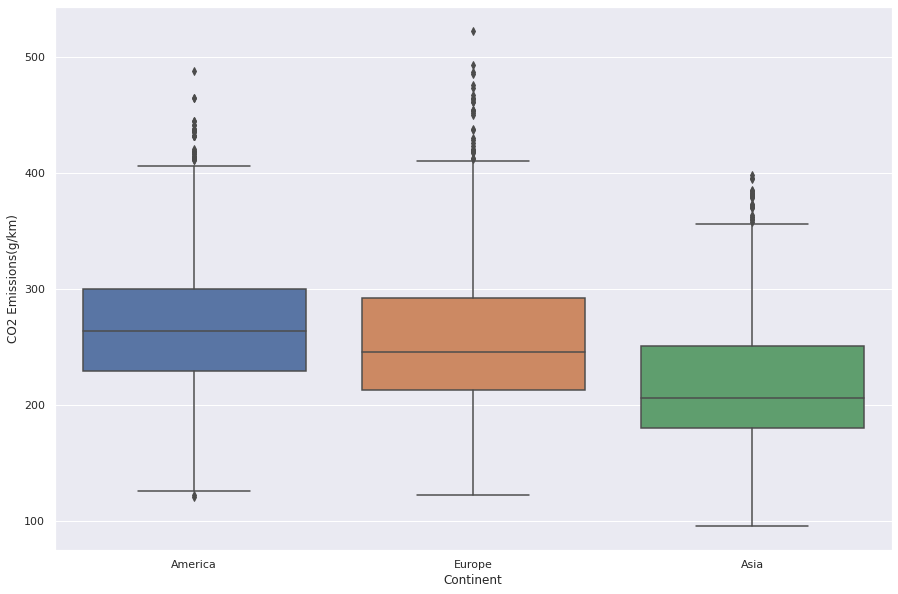

In [27]:
sns.set(rc={'figure.figsize':(15,10)})

#Emisión de los carros por continentes
sns.boxplot(x="Continent", y="CO2 Emissions(g/km)", data=parameters)

<AxesSubplot:xlabel='Automatic / Manual', ylabel='CO2 Emissions(g/km)'>

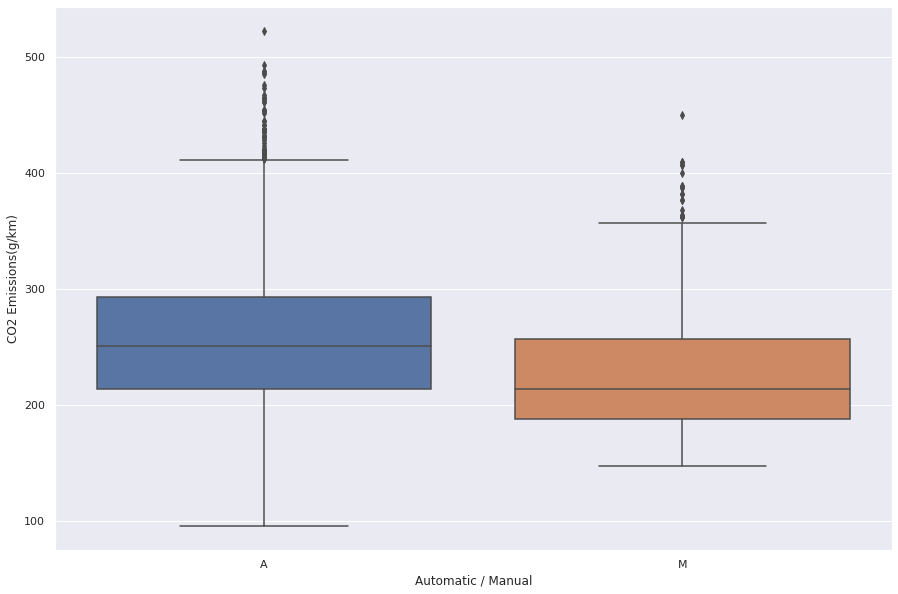

In [28]:
#Emisión de los carros por transmisión
sns.boxplot(x="Automatic / Manual", y="CO2 Emissions(g/km)", data=parameters)

<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

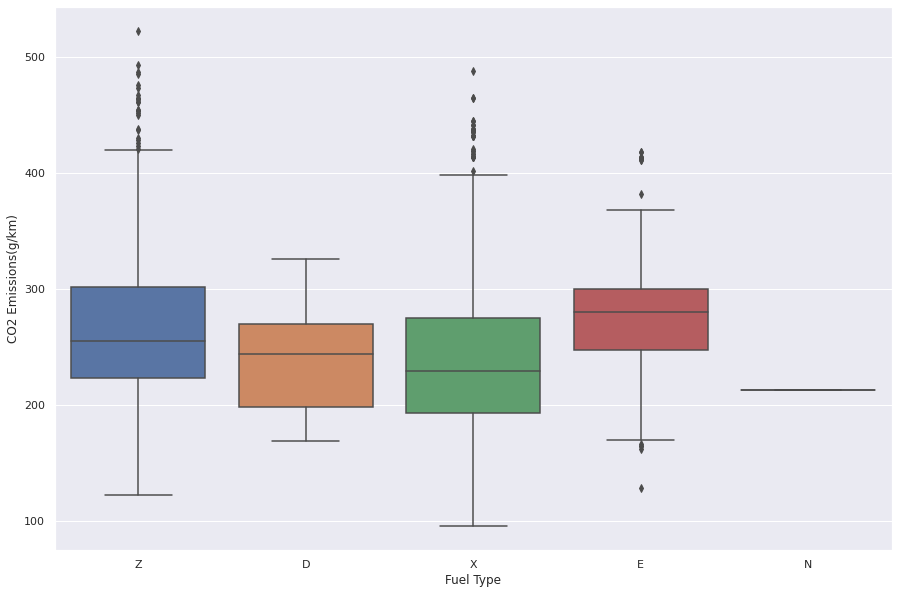

In [29]:
#Emisión de los carros por tipo de combustible
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=parameters)

<AxesSubplot:xlabel='Automatic / Manual', ylabel='count'>

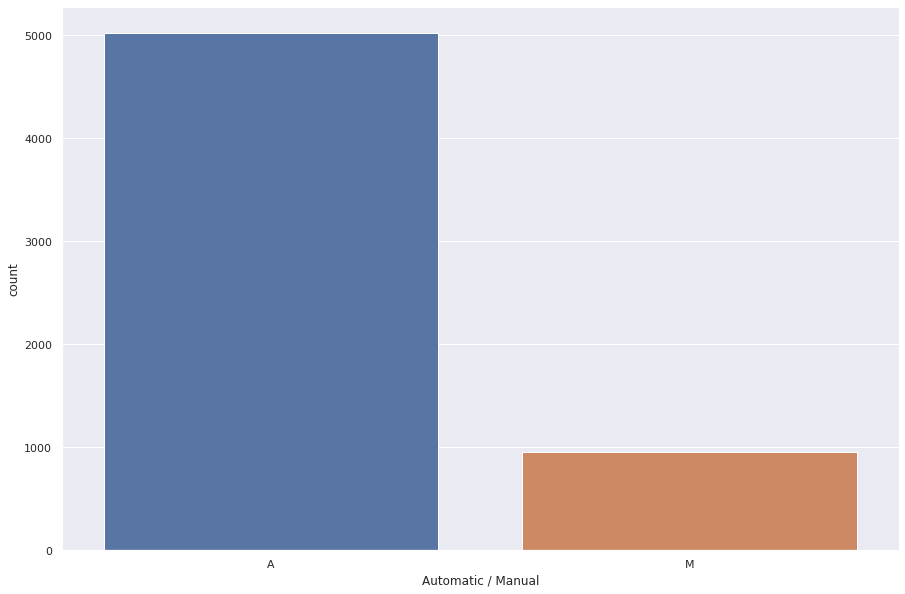

In [30]:
#Conteo de automóviles con transmisión manual y automática
sns.countplot(x="Automatic / Manual", data=parameters)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Make'>

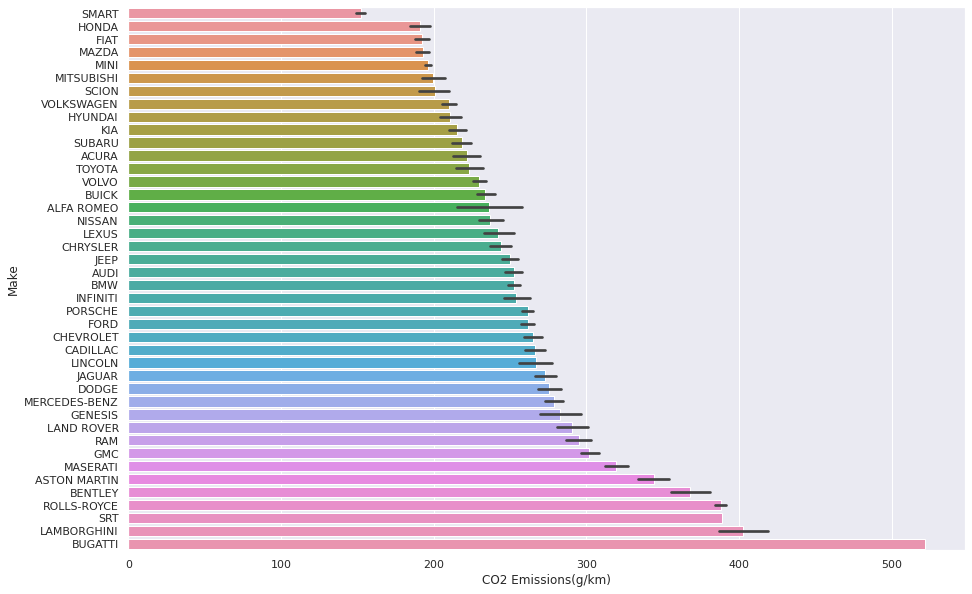

In [31]:
#Emisión promedio de CO2 por marca de automóvil
#Se utiliza la el mismo método que se utilizó para encontrar la emisión media de C02 por marca 
#y el método sort_value para darle orden
sns.barplot(y="Make", x="CO2 Emissions(g/km)", data=parameters, order=parameters.groupby(['Make']).mean().sort_values('CO2 Emissions(g/km)').index)

Finalmente se crea un nuevo dataframe basado en el original, donde los automoviles están organizados de forma descendente por su emisión de CO2, este nuevo dataframe se guarda en un archivo CSV

In [32]:
df = parameters.sort_values(by = 'CO2 Emissions(g/km)', ascending = False, kind = 'mergesort').reset_index()

df.drop(columns='index', inplace=True)

In [33]:
df.to_csv('out.csv',index=False)

## 2.1

En primer lugar se llama el dataset y se convierte a formato de pandas

In [34]:
url_3='https://raw.githubusercontent.com/mhemmg/datasets/master/sport/athlete_events.csv'
olimpics=pd.read_csv(url_3)

Se eliminan las columans con valores NaN y se observa el dataset para saber cómo proceder

In [35]:
olimpics = olimpics.dropna()

In [36]:
olimpics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


usando el método loc, se crea un nuevo dataset, para finalmente quedar solo con las medallistas de oro femeninas en remo

In [37]:
row = olimpics.loc[olimpics['Medal'] == 'Gold']

In [38]:
row = row.loc[row['Sex'] == 'F']

In [39]:
row = row.loc[row['Sport'] == 'Rowing']

Se organiza el dataset por año y se realiza un regplot de seaborn donde se observa claramente la tendencia ascendente de la edad de las deportistas

In [40]:
row = row.sort_values(by = 'Year', ascending = True, kind = 'mergesort')

<AxesSubplot:xlabel='Year', ylabel='Age'>

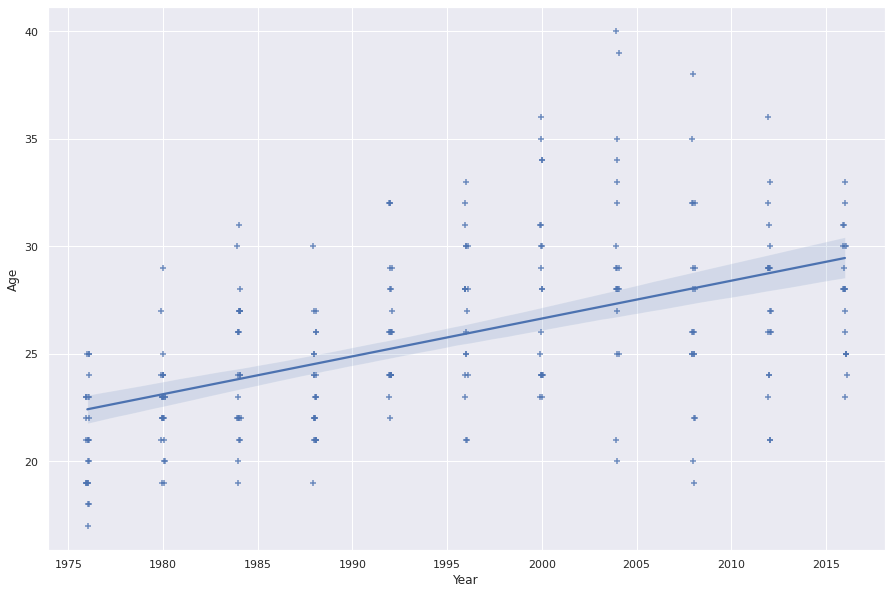

In [41]:
sns.regplot(data=row, x="Year", y="Age", marker="+",x_jitter=.1)


## 2.2

Se desean saber los dies paises con más y menos medallas en la historia por tipologia (oro, plata o bronce)

Primero para el oro, se ve que el país con más medallas es Estados Unidos, y entre los que menos se encuentran Puerto Ricom Ecuador y Egipto

In [42]:
gold = olimpics.loc[olimpics['Medal'] == 'Gold'].groupby(['Team']).count()['Medal'].sort_values()

In [43]:
gold[:10]

Team
Satchmo                                    1
Slaghoken II                               1
Singapore                                  1
Jordan                                     1
Ecuador                                    1
Egypt                                      1
Elvis Va                                   1
England-1                                  1
Puerto Rico                                1
Philadelphia Turngemeinde, Philadelphia    1
Name: Medal, dtype: int64

In [44]:
gold[-10:]

Team
Italy             302
China             308
Australia         313
Great Britain     321
Canada            350
Russia            356
East Germany      368
Germany           508
Soviet Union      961
United States    2075
Name: Medal, dtype: int64

Ahora, para la plata, se puede ver que el equipo con más medallas es Estados Unidos, y entre los que menos tienen se encuentran Ghana, Sudan y Costa Rica

In [45]:
silver = olimpics.loc[olimpics['Medal'] == 'Silver'].groupby(['Team']).count()['Medal'].sort_values()

In [46]:
silver[:10]

Team
Djinn            1
Falcon IV        1
Sunrise          1
Sudan            1
Sri Lanka        1
Costa Rica       1
Cote d'Ivoire    1
Cyprus           1
Ghana            1
Nadine           1
Name: Medal, dtype: int64

In [47]:
silver[-10:]

Team
France            320
China             323
Canada            336
Italy             340
Great Britain     343
Russia            343
Australia         412
Germany           470
Soviet Union      629
United States    1260
Name: Medal, dtype: int64

Finalmente, para el bronce, se ve que el equipo con más medallas es Estados Unidos y entre los que menos se encuentran Guyana, Hong Kong y Macedonia.

In [48]:
bronze = olimpics.loc[olimpics['Medal'] == 'Bronze'].groupby(['Team']).count()['Medal'].sort_values()

In [49]:
bronze[:10]

Team
Zimbabwe              1
Digby                 1
Macedonia             1
Buraddoo              1
Cameroon              1
Libellule de Paris    1
Lebanon               1
Mozambique            1
Hong Kong             1
Guyana                1
Name: Medal, dtype: int64

In [50]:
bronze[-10:]

Team
Canada           338
Japan            345
Great Britain    346
France           366
Italy            366
Russia           392
Australia        471
Germany          540
Soviet Union     613
United States    938
Name: Medal, dtype: int64